In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read catalogs for QSO and Stars.  
# Select QSO 
# Select Stars
# Sample 1 : using all stars
# Sample 2 : using the same number of stars as QSO 

# Compare the distribution of mag and CRTS err from the catalog for those two samples 

In [5]:
def get_stars_catalog():
    File = 'CRTS_SDSS_cross_matched_stars_catalog.txt'
    colnames = open(File,'r').read().splitlines()[0][1:].split()
    datatable = np.genfromtxt(File)
    stars_catalog = {}
    print 'zipping CRTS-SDSS stars catalog...'
    for label, column in zip(colnames, datatable.T):
        stars_catalog[label] = column
        
    return  colnames, stars_catalog

cols2 , star_cat= get_stars_catalog()


def get_qso_catalog(catalog):
    if catalog == 's82drw':
        File = 'CRTS_SDSS_cross_matched_qso_s82drw_catalog.txt'
    if catalog == 'DB_QSO':
        File = 'CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt'
    colnames = open(File,'r').read().splitlines()[0][1:].split()
    datatable = np.genfromtxt(File)
    qso_catalog = {}
    print 'Zipping CRTS-SDSS quasars catalog from ', File, ' ...'
    for label, column in zip(colnames, datatable.T):
        qso_catalog[label] = column
    
    qso_names = np.genfromtxt('CRTS_SDSS_cross_matched_qso_names.txt', dtype=str)    
    for i in range(len(qso_names)):
        qso_names[i] = qso_names[i][4:-4]
    print 'Read in ', len(qso_catalog['redshift']), ', quasars from CRTS'
    return  colnames, qso_catalog, qso_names

cols1, qso_cat, qso_names = get_qso_catalog(catalog='DB_QSO') 



zipping CRTS-SDSS stars catalog...
Zipping CRTS-SDSS quasars catalog from  CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt  ...
Read in  7601 , quasars from CRTS


In [6]:
def cut_stars(star_cat=star_cat, mMin=-9, mMax=19, mErrMin = -9, 
              mErrMax = 0.3, gi_Min = -1, gi_Max=1  ):

    mask_mag = (star_cat['r_mMed'] > mMin) * (star_cat['r_mMed'] < mMax) 
    mask_err = (star_cat['CRTS_Merr'] > mErrMin) * (star_cat['CRTS_Merr'] < mErrMax)
    SDSS_gi = star_cat['g_mMed'] - star_cat['i_mMed']
    mask_color = (SDSS_gi > gi_Min ) * (SDSS_gi < gi_Max)
    mask = mask_mag * mask_err * mask_color
    star_id = star_cat['crts_id'][mask]
   
    print '\n These cuts reduced the number of stars  in the sample from', \
          len(star_cat['CRTS_M']), ' to ', len(star_id)
    return  star_id


def cut_qso(qso_cat=qso_cat, qso_names=qso_names, mMin=-9, mMax=19, 
            mErrMin = -9, mErrMax = 0.3):

    mask_mag = (qso_cat['r'] > mMin) * (qso_cat['r'] < mMax) 
    mask_err = (qso_cat['CRTS_avg_e'] > mErrMin) * (qso_cat['CRTS_avg_e'] < mErrMax)
    mask = mask_mag * mask_err 
    qso_id = qso_names[mask]
    print '\n These cuts reduced the number of qso  in the sample from', \
          len(qso_cat['redshift']), ' to ', len(qso_id)
    return  qso_id, mask 



In [11]:
# Make 17-19 and 0-20 cuts for blue stars , both with err<0.3 

id_1 = cut_stars(mMin=17, mMax=19)
id_2 = cut_stars(mMin=0, mMax=20)

# Make 17-19 and 0-20 cuts for QSO , both with err<0.3 
good_ids_QSO1, mask_qso = cut_qso(mMin = 17, mMax=19, mErrMax = 0.3)
good_ids_QSO2, mask_qso = cut_qso(mMin = 0, mMax=20, mErrMax = 0.3)




 These cuts reduced the number of stars  in the sample from 47787  to  5698

 These cuts reduced the number of stars  in the sample from 47787  to  13845

 These cuts reduced the number of qso  in the sample from 7601  to  1270

 These cuts reduced the number of qso  in the sample from 7601  to  4770


In [12]:
# Figure out how many qso are in the cut
Nqso1 = len(good_ids_QSO1)
Nqso2 = len(good_ids_QSO2)

In [16]:
# Read in the master file list 
masterFiles_S = os.listdir('sf_file_per_LC/star/')
masterFilesS = [name[3:-4] for name in masterFiles_S]


In [32]:
# 17-19 : compare using all master files for stars, as opposed to choosing as many as qso only. 

# Use all master files
m1 = np.in1d(star_cat['crts_id'], id_1)

# Peg the number of master files for stars to QSO 

stars_masters = np.array(masterFilesS[:Nqso1]).astype(float)
stars_selected = stars_masters[np.in1d(stars_masters, id_1)]
mp1 = np.in1d(star_cat['crts_id'], stars_selected)


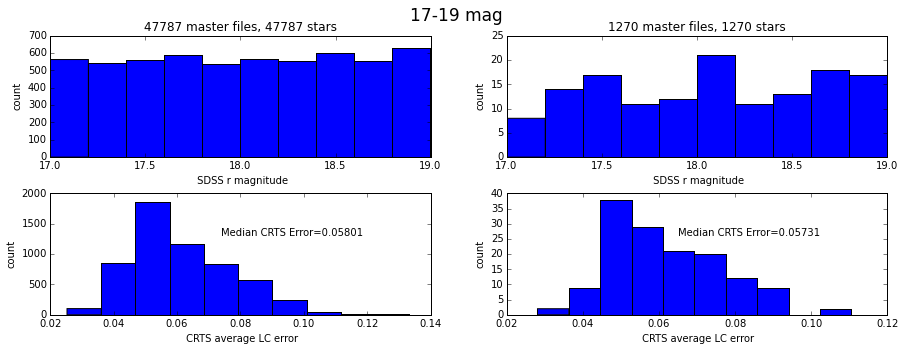

In [39]:
# Plot 17-19 stars comparing two available catalogs of stars 

%matplotlib inline 
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

ax[0,0].hist(star_cat['r_mMed'][m1])
ax[0,0].set(title='47787 master files, 47787 stars' , xlabel=' SDSS r magnitude ', 
             ylabel='count'  )

ax[0,1].hist(star_cat['r_mMed'][mp1])
ax[0,1].set(title='1270 master files, 1270 stars' , xlabel=' SDSS r magnitude ', 
             ylabel='count'  )

da=star_cat['CRTS_Merr'][m1]
ax[1,0].hist(da)
ax[1,0].set( xlabel=' CRTS average LC error ', ylabel='count'  )
ax[1,0].text(0.45, 0.65, 'Median CRTS Error=%.5f'%np.median(da) ,transform=ax[1,0].transAxes)

db=star_cat['CRTS_Merr'][mp1]
ax[1,1].hist(db)
ax[1,1].set( xlabel=' CRTS average LC error ', ylabel='count'  )
ax[1,1].text(0.45, 0.65, 'Median CRTS Error=%.5f'%np.median(db) ,transform=ax[1,1].transAxes)

fig.subplots_adjust(hspace=0.3)
fig.suptitle('17-19 mag', fontsize=17)

In [35]:
# 0-20 : compare using all master files for stars, as opposed to choosing as many as qso only. 

# Use all master files
m2 = np.in1d(star_cat['crts_id'], id_2)

# Peg the number of master files for stars to QSO 

stars_masters = np.array(masterFilesS[:Nqso2]).astype(float)
stars_selected = stars_masters[np.in1d(stars_masters, id_2)]
mp2 = np.in1d(star_cat['crts_id'], stars_selected)

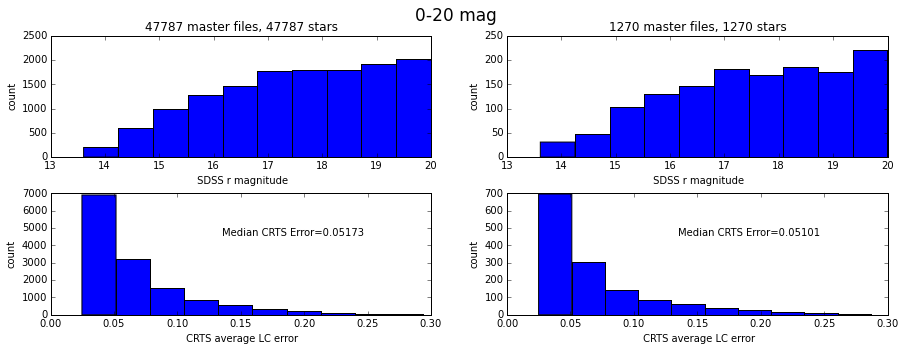

In [40]:
# Plot 0-20 stars comparing two available catalogs of stars 

%matplotlib inline 
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

ax[0,0].hist(star_cat['r_mMed'][m2])
ax[0,0].set(title='47787 master files, 47787 stars' , xlabel=' SDSS r magnitude ', 
             ylabel='count'  )

ax[0,1].hist(star_cat['r_mMed'][mp2])
ax[0,1].set(title='1270 master files, 1270 stars' , xlabel=' SDSS r magnitude ', 
             ylabel='count'  )

da=star_cat['CRTS_Merr'][m2]
ax[1,0].hist(da)
ax[1,0].set( xlabel=' CRTS average LC error ', ylabel='count'  )
ax[1,0].text(0.45, 0.65, 'Median CRTS Error=%.5f'%np.median(da) ,transform=ax[1,0].transAxes)

db=star_cat['CRTS_Merr'][mp2]
ax[1,1].hist(db)
ax[1,1].set( xlabel=' CRTS average LC error ', ylabel='count'  )
ax[1,1].text(0.45, 0.65, 'Median CRTS Error=%.5f'%np.median(db) ,transform=ax[1,1].transAxes)

fig.subplots_adjust(hspace=0.3)
fig.suptitle('0-20 mag', fontsize=17)